In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import seaborn as sns

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [7]:
df = pd.read_csv('insurance_data.csv')

## could seperate this box 
df.isna().sum()
newdf = df.dropna()
# newdf = newdf.drop(axis=1,columns=['index','PatientID'])

df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [8]:
# changing data to be all numerical value
Gender = {'male':0,'female':1}
boolean = {'Yes':0,'No':1}
Region = {'southeast':1,'northeast':2,'southwest':3,'northwest':4}
newdf.gender = [Gender[item] for item in newdf['gender']]
newdf.diabetic = [boolean[item] for item in newdf.diabetic]
newdf.smoker = [boolean[item] for item in newdf.smoker]
newdf.region = [Region[item] for item in newdf.region]

<ipython-input-8-4c5b7dc5c053>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.gender = [Gender[item] for item in newdf['gender']]
<ipython-input-8-4c5b7dc5c053>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.diabetic = [boolean[item] for item in newdf.diabetic]
<ipython-input-8-4c5b7dc5c053>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Outliers:  [array([34828.65, 34838.87, 35069.37, 35147.53, 35160.13, 35491.64,
       35585.58, 35595.59, 36021.01, 36085.22, 36124.57, 36149.48,
       36189.1, 36197.7, 36219.41, 36307.8, 36397.58, 36580.28, 36837.47,
       36898.73, 36910.61, 36950.26, 37079.37, 37133.9, 37165.16,
       37270.15, 37465.34, 37484.45, 37607.53, 37701.88, 37742.58,
       37829.72, 38126.25, 38245.59, 38282.75, 38344.57, 38415.47,
       38511.63, 38709.18, 38711.0, 38746.36, 38792.69, 38998.55,
       39047.29, 39125.33, 39241.44, 39556.49, 39597.41, 39611.76,
       39722.75, 39725.52, 39727.61, 39774.28, 39836.52, 39871.7,
       39983.43, 40003.33, 40103.89, 40182.25, 40273.65, 40419.02,
       40720.55, 40904.2, 40932.43, 40941.29, 40974.16, 41034.22,
       41097.16, 41661.6, 41676.08, 41919.1, 41949.24, 41999.52, 42111.66,
       42112.24, 42124.52, 42211.14, 42303.69, 42560.43, 42760.5,
       42856.84, 42969.85, 42983.46, 43254.42, 43578.94, 43753.34,
       43813.87, 43896.38, 43921.18, 439

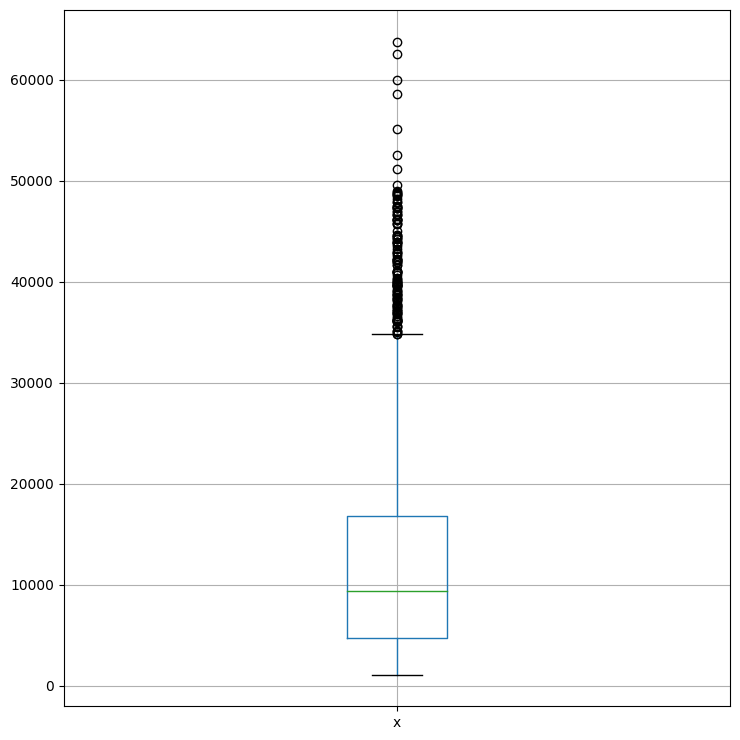

In [9]:
# check for outliers
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True


_, bp = pd.DataFrame.boxplot(newdf.claim, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

print("Outliers: ", outliers)
outliers = np.array(outliers)
print(outliers.shape)
print("Boxes: ", boxes)
print("Medians: ", medians)
print("Whiskers: ", whiskers)

plt.show()

<ipython-input-6-0a3aa5f358d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.gender = [Gender[item] for item in newdf['gender']]
<ipython-input-6-0a3aa5f358d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.diabetic = [boolean[item] for item in newdf.diabetic]
<ipython-input-6-0a3aa5f358d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Outliers:  [array([34828.65, 34838.87, 35069.37, 35147.53, 35160.13, 35491.64,
       35585.58, 35595.59, 36021.01, 36085.22, 36124.57, 36149.48,
       36189.1, 36197.7, 36219.41, 36307.8, 36397.58, 36580.28, 36837.47,
       36898.73, 36910.61, 36950.26, 37079.37, 37133.9, 37165.16,
       37270.15, 37465.34, 37484.45, 37607.53, 37701.88, 37742.58,
       37829.72, 38126.25, 38245.59, 38282.75, 38344.57, 38415.47,
       38511.63, 38709.18, 38711.0, 38746.36, 38792.69, 38998.55,
       39047.29, 39125.33, 39241.44, 39556.49, 39597.41, 39611.76,
       39722.75, 39725.52, 39727.61, 39774.28, 39836.52, 39871.7,
       39983.43, 40003.33, 40103.89, 40182.25, 40273.65, 40419.02,
       40720.55, 40904.2, 40932.43, 40941.29, 40974.16, 41034.22,
       41097.16, 41661.6, 41676.08, 41919.1, 41949.24, 41999.52, 42111.66,
       42112.24, 42124.52, 42211.14, 42303.69, 42560.43, 42760.5,
       42856.84, 42969.85, 42983.46, 43254.42, 43578.94, 43753.34,
       43813.87, 43896.38, 43921.18, 439

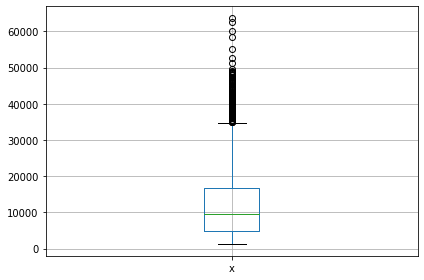

In [10]:
outdata = newdf[newdf.claim >50000]
outdata

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1333,1333,1334,44.0,0,36.4,127,1,1,0,3,51194.56
1334,1334,1335,43.0,0,32.8,125,1,0,0,3,52590.83
1335,1335,1336,44.0,1,35.5,88,0,0,0,4,55135.40
1336,1336,1337,59.0,1,38.1,120,1,1,0,2,58571.07
1337,1337,1338,30.0,0,34.5,91,0,3,0,4,60021.40
1338,1338,1339,37.0,0,30.4,106,1,0,0,1,62592.87
1339,1339,1340,30.0,1,47.4,101,1,0,0,1,63770.43


<AxesSubplot: >

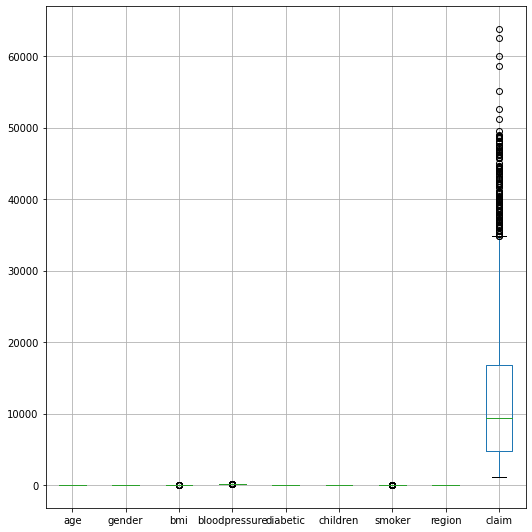

In [17]:
# outdata
# newdf.drop(newdf[newdf.claim]>50000)
newdf = newdf[newdf.claim < 50000]

In [ ]:
newdf

In [ ]:
newdf.isna().sum()

In [18]:
train_data, test_data = train_test_split(newdf, test_size=0.25,random_state=13)
print('(train) (test) new shape ',end=' = ')
print(train_data.shape,test_data.shape)
y_train, x_train = train_data.iloc[:,:1], train_data.iloc[:,1:]
y_test, x_test = test_data.iloc[:,:1], test_data.iloc[:,1:]

(train) (test) new shape  = (993, 11) (332, 11)


In [19]:
def scale_datasets(x_train,x_test):
    """
    Standard Scale test and train data
    Z-Score normalization
    """

    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(x_train),
        columns = x_train.columns
    )
    x_test_scaled = pd.DataFrame(
        standard_scaler.transform(x_test),
        columns= x_test.columns
    )

    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train,x_test)

In [20]:
#Build the model
hidden_units1 = 10
hidden_units2 = 20
hidden_units3 = 10
hidden_units4 = 10
# hidden_units5 = 576

learning_rate = 0.08

#Create the model using Sequential in tf
def build_model_Sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        # Dropout(0.2),
        # Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
        # Dropout(0.2),
        # Dense(hidden_units5, kernel_initializer='normal', activation='relu'),

        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model


In [21]:

model = build_model_Sequential()
#loss function 
msle = MeanSquaredLogarithmicError()
model.compile(
    loss = msle,
    # optimizer = 'SGD',
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [msle]
)

In [22]:
#train the model
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=20,
    batch_size=64,
    validation_split= 0.2
)

Epoch 1/20
13/13 [==============================] - 2s 29ms/step - loss: 18.5783 - mean_squared_logarithmic_error: 17.8029 - val_loss: 1.0825 - val_mean_squared_logarithmic_error: 1.0508
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0937 - mean_squared_logarithmic_error: 1.1373 - val_loss: 1.3241 - val_mean_squared_logarithmic_error: 1.4003
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 1.1641 - mean_squared_logarithmic_error: 1.1701 - val_loss: 0.7412 - val_mean_squared_logarithmic_error: 0.6801
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5223 - mean_squared_logarithmic_error: 0.5168 - val_loss: 0.3696 - val_mean_squared_logarithmic_error: 0.3729
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.3110 - mean_squared_logarithmic_error: 0.3022 - val_loss: 0.1860 - val_mean_squared_logarithmic_error: 0.1905
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.2

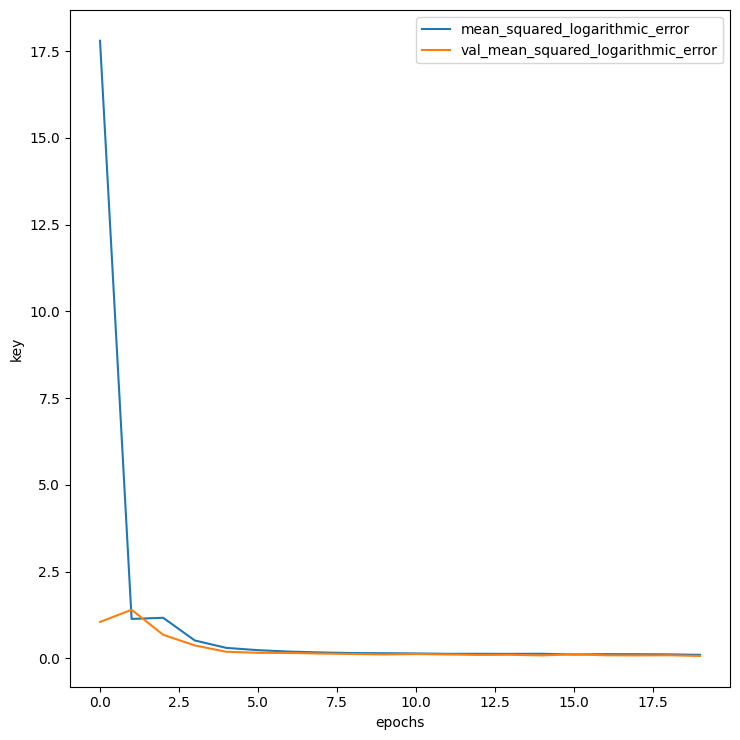

11/11 [==============================] - 0s 800us/step


In [23]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("epochs")
    plt.ylabel("key")
    plt.legend([key,'val_'+key])
    plt.show()

plot_history(history,'mean_squared_logarithmic_error')

## predict and save prediction
x_test['prediction'] = model.predict(x_test_scaled)

In [24]:
print('Error check:- \nmeanabsolute = {0}\nmeansquared = {1}\nrootmeansq = {2}\nR^2 value = {3}'.format(mean_absolute_error(y_test,x_test['prediction']),
                                                                     mean_squared_error(y_test,x_test['prediction']),
                                                                     np.sqrt(mean_squared_error(y_test,x_test['prediction'])),
                                                                     r2_score(y_test,x_test['prediction'])
                                                                     ))

Error check:- 
meanabsolute = 50.31871025820813
meansquared = 4903.698488763704
rootmeansq = 70.02641279377164
R^2 value = 0.9674584737933051


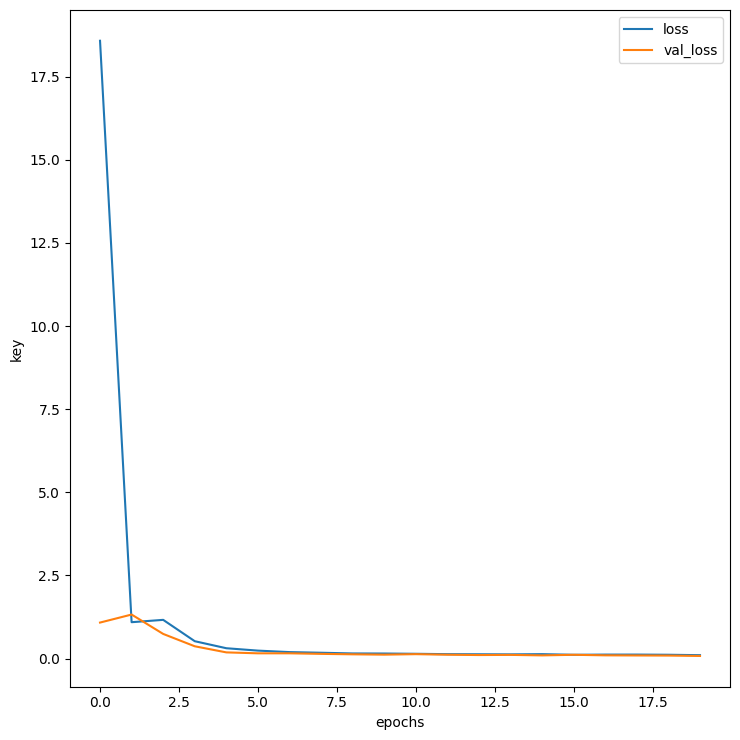

In [25]:
def plot_history(history,key):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("epochs")
    plt.ylabel("key")
    plt.legend(['loss','val_loss'])
    plt.show()

plot_history(history,'mean_squared_logarithmic_error')

## predict and save prediction
# x_test['prediction'] = model.predict(x_test)